### Student Information
Name: 蔡沅珈 Tsai, Yuan-Chia

Student ID: 109164503

GitHub ID: 45623944

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

# Part 1

# Exercise 1

In [2]:
X.columns = [column.replace(" ", "_") for column in X.columns]
  
# using query method and print result
print(X.query('category == 1', inplace = False))

NameError: name 'X' is not defined

# Exercise 2

For .isnull(), it just check if there is ' ' after 'missing_example':, so even id F has nothing in ' ', but if there is ' ' after 'missing_example':, we will get the result False which means this is not a missing value.

# Exercise 3

For sampling method, the data set will change each time once we run the code again, and because it is random, we can not sure if X_sample can well represent the data X. Of course when the data set is smaller, we can get the analysis result faster.

# Exercise 4

In [3]:
# plot barchart for X and X_sample
width = 0.2
plt.bar(np.arange(len(X.category_name.value_counts())), X.category_name.value_counts(), width = width)
plt.bar(np.arange(len(X_sample.category_name.value_counts())) + width, X_sample.category_name.value_counts(), width = width, color = 'orange')
plt.title('Category distribution')
plt.xticks(np.arange(4), ('soc.religion.christian', 'sci.med', 'comp.graphics', 'alt.atheism'))
plt.legend(('category_name', 'category_name'))

NameError: name 'plt' is not defined

# Exercise 5

In [4]:
print(X_counts[0:5, 0:100])
count_vect.get_feature_names()[37:38]
# another 1 in the same record represents the 01 term.

NameError: name 'X_counts' is not defined

# Exercise 6

In [5]:
plot_x1 = ["term_"+str(i) for i in count_vect.get_feature_names()[0:100]]
plot_y1 = ["doc_"+ str(i) for i in list(X.index)[0:100]]
plot_z1 = X_counts[0:100, 0:100].toarray()

df_todraw = pd.DataFrame(plot_z1, columns = plot_x1, index = plot_y1)
plt.subplots(figsize=(25, 17))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True, mask=df_todraw<1)
# we can add mask to let tons of zero disappear, this may much clear to see where 1 is. Also get the plot bigger will also help us to see the plot clearly.

NameError: name 'count_vect' is not defined

# Exercise 7

NameError: name 'PCA' is not defined

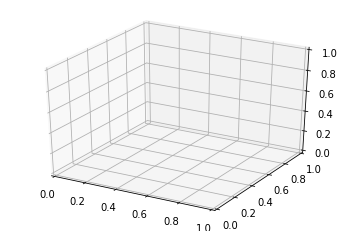

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
X_reduced1 = PCA(n_components = 3).fit_transform(X_counts.toarray())

# Grab some test data.
for c, category in zip(col, categories):
    xs = X_reduced1[X['category_name'] == category].T[0]
    ys = X_reduced1[X['category_name'] == category].T[1]
    zs = X_reduced1[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')
    
# Plot a basic wireframe.
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

for ii in range(0,360,1):
    ax.view_init(elev=10., azim=ii)
plt.show()

# we can change elev=10 to 1 and 100 to see different angle of the plot. For 3D plot, the points may gather closer instead of 2D plot. 

# Exercise 8

In [2]:
import plotly.graph_objects as go
bar_plots = [go.Bar(x=count_vect.get_feature_names()[:300], y=term_frequencies[:300], marker=go.bar.Marker(color='#0343df'))]
fig = go.Figure(data=bar_plots)
fig.show()

NameError: name 'count_vect' is not defined

# Exercise 9

In [3]:
new_term_frequencies = term_frequencies[term_frequencies > 500]
plt.subplots(figsize=(50, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:50], 
            y=new_term_frequencies[:50])
g.set_xticklabels(count_vect.get_feature_names()[:50], rotation = 90);
# find the frequencies which > 500 and draw the plot.

NameError: name 'term_frequencies' is not defined

# Exercise 10

In [4]:
new_term_frequencies = term_frequencies[term_frequencies > 500]
sort = np.argsort(-new_term_frequencies)
plt.subplots(figsize=(50, 10))
g = sns.barplot(x=np.asarray(count_vect.get_feature_names())[sort[:50]], 
            y=new_term_frequencies[sort[:50]])
g.set_xticklabels(count_vect.get_feature_names()[:50], rotation = 90);

NameError: name 'term_frequencies' is not defined

# Exercise 11

In [7]:
mlb.fit(X.category_name)
mlb.classes_
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

# it still work if we change it to category_name.

NameError: name 'mlb' is not defined

# Part 2

In [152]:
# transfer the data to csv first, the result is already dataframe.
import pandas as pd
import os 

os.chdir('C:\\Users\\chuck\\Downloads\\sentiment labelled sentences')
amazon = pd.read_csv('amazon_cells_labelled.csv', header = None)

In [153]:
# define column name
amazon.columns = ['sentence','score']

In [154]:
# add category and category_name
amazon['category'] = 0
amazon['category_name'] = 'amazon'

In [155]:
amazon

,sentence,score,category,category_name
0,So there is no way for me to plug it in here i...,0,0,amazon
1,"Good case, Excellent value.",1,0,amazon
2,Great for the jawbone.,1,0,amazon
3,Tied to charger for conversations lasting more...,0,0,amazon
4,The mic is great.,1,0,amazon
...,...,...,...,...
995,The screen does get smudged easily because it ...,0,0,amazon
996,What a piece of junk.. I lose more calls on th...,0,0,amazon
997,Item Does Not Match Picture.,0,0,amazon
998,The only thing that disappoint me is the infra...,0,0,amazon


In [156]:
imdb = pd.read_csv('imdb_labelled.csv', header = None)

In [157]:
imdb.columns = ['sentence','score']

In [158]:
imdb['category'] = 1
imdb['category_name'] = 'imdb'

In [159]:
imdb

,sentence,score,category,category_name
0,"A very, very, very slow-moving, aimless movie ...",0.0,1,imdb
1,Not sure who was more lost - the flat characte...,0.0,1,imdb
2,Attempting artiness with black & white and cle...,0.0,1,imdb
3,Very little music or anything to speak of.,0.0,1,imdb
4,The best scene in the movie was when Gerardo i...,1.0,1,imdb
...,...,...,...,...
995,I just got bored watching Jessice Lange take h...,0.0,1,imdb
996,"Unfortunately, any virtue in this film's produ...",0.0,1,imdb
997,"In a word, it is embarrassing.",0.0,1,imdb
998,Exceptionally bad!,0.0,1,imdb


In [160]:
yelp = pd.read_csv('yelp_labelled.csv', header = None)

In [161]:
yelp.columns = ['sentence','score']

In [162]:
yelp['category'] = 2
yelp['category_name'] = 'yelp'

In [163]:
yelp

,sentence,score,category,category_name
0,Wow... Loved this place.,1,2,yelp
1,Crust is not good.,0,2,yelp
2,Not tasty and the texture was just nasty.,0,2,yelp
3,Stopped by during the late May bank holiday of...,1,2,yelp
4,The selection on the menu was great and so wer...,1,2,yelp
...,...,...,...,...
995,I think food should have flavor and texture an...,0,2,yelp
996,Appetite instantly gone.,0,2,yelp
997,Overall I was not impressed and would not go b...,0,2,yelp
998,"The whole experience was underwhelming, and I ...",0,2,yelp


In [164]:
# merge 3 data together
data = pd.concat([amazon,imdb,yelp])

In [165]:
data

,sentence,score,category,category_name
0,So there is no way for me to plug it in here i...,0.0,0,amazon
1,"Good case, Excellent value.",1.0,0,amazon
2,Great for the jawbone.,1.0,0,amazon
3,Tied to charger for conversations lasting more...,0.0,0,amazon
4,The mic is great.,1.0,0,amazon
...,...,...,...,...
995,I think food should have flavor and texture an...,0.0,2,yelp
996,Appetite instantly gone.,0.0,2,yelp
997,Overall I was not impressed and would not go b...,0.0,2,yelp
998,"The whole experience was underwhelming, and I ...",0.0,2,yelp


In [166]:
len(data)

3000

In [167]:
data[0:2]

,sentence,score,category,category_name
0,So there is no way for me to plug it in here i...,0.0,0,amazon
1,"Good case, Excellent value.",1.0,0,amazon


In [168]:
for t in data["sentence"][:3]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


In [169]:
# a simple query
data[0:10][["sentence", "category_name"]]

,sentence,category_name
0,So there is no way for me to plug it in here i...,amazon
1,"Good case, Excellent value.",amazon
2,Great for the jawbone.,amazon
3,Tied to charger for conversations lasting more...,amazon
4,The mic is great.,amazon
5,I have to jiggle the plug to get it to line up...,amazon
6,If you have several dozen or several hundred c...,amazon
7,If you are Razr owner...you must have this!,amazon
8,"Needless to say, I wasted my money.",amazon
9,What a waste of money and time!.,amazon


In [170]:
data[-10:]

,sentence,score,category,category_name
990,The refried beans that came with my meal were ...,0.0,2,yelp
991,Spend your money and time some place else.,0.0,2,yelp
992,A lady at the table next to us found a live gr...,0.0,2,yelp
993,the presentation of the food was awful.,0.0,2,yelp
994,I can't tell you how disappointed I was.,0.0,2,yelp
995,I think food should have flavor and texture an...,0.0,2,yelp
996,Appetite instantly gone.,0.0,2,yelp
997,Overall I was not impressed and would not go b...,0.0,2,yelp
998,"The whole experience was underwhelming, and I ...",0.0,2,yelp
999,"Then, as if I hadn't wasted enough of my life ...",0.0,2,yelp


In [171]:
# using iloc (by position)
data.iloc[::10, 0:2][0:10]

,sentence,score
0,So there is no way for me to plug it in here i...,0.0
10,And the sound quality is great.,1.0
20,I went on Motorola's website and followed all ...,0.0
30,"This is a simple little phone to use, but the ...",0.0
40,"It has a great camera thats 2MP, and the pics ...",1.0
50,Not loud enough and doesn't turn on like it sh...,0.0
60,Essentially you can forget Microsoft's tech su...,0.0
70,Mic Doesn't work.,0.0
80,I wear it everyday and it holds up very well.,1.0
90,For a product that costs as much as this one d...,0.0


In [172]:
# using loc (by label)
data.loc[::10, 'sentence'][0:10] #can choose category

0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
20    I went on Motorola's website and followed all ...
30    This is a simple little phone to use, but the ...
40    It has a great camera thats 2MP, and the pics ...
50    Not loud enough and doesn't turn on like it sh...
60    Essentially you can forget Microsoft's tech su...
70                                    Mic Doesn't work.
80        I wear it everyday and it holds up very well.
90    For a product that costs as much as this one d...
Name: sentence, dtype: object

In [173]:
# standard query (Cannot simultaneously select rows and columns)
data[::10][0:10]

,sentence,score,category,category_name
0,So there is no way for me to plug it in here i...,0.0,0,amazon
10,And the sound quality is great.,1.0,0,amazon
20,I went on Motorola's website and followed all ...,0.0,0,amazon
30,"This is a simple little phone to use, but the ...",0.0,0,amazon
40,"It has a great camera thats 2MP, and the pics ...",1.0,0,amazon
50,Not loud enough and doesn't turn on like it sh...,0.0,0,amazon
60,Essentially you can forget Microsoft's tech su...,0.0,0,amazon
70,Mic Doesn't work.,0.0,0,amazon
80,I wear it everyday and it holds up very well.,1.0,0,amazon
90,For a product that costs as much as this one d...,0.0,0,amazon


In [174]:
data.columns = [column.replace(" ", "_") for column in data.columns]
  
# using query method and print result
print(data.query('category == 1', inplace = False))

                                              sentence  score  category  \
0    A very, very, very slow-moving, aimless movie ...    0.0         1   
1    Not sure who was more lost - the flat characte...    0.0         1   
2    Attempting artiness with black & white and cle...    0.0         1   
3         Very little music or anything to speak of.      0.0         1   
4    The best scene in the movie was when Gerardo i...    1.0         1   
..                                                 ...    ...       ...   
995  I just got bored watching Jessice Lange take h...    0.0         1   
996  Unfortunately, any virtue in this film's produ...    0.0         1   
997                   In a word, it is embarrassing.      0.0         1   
998                               Exceptionally bad!      0.0         1   
999  All in all its an insult to one's intelligence...    0.0         1   

    category_name  
0            imdb  
1            imdb  
2            imdb  
3            imdb  

In [175]:
data.loc[lambda f: f.category_name == 'amazon'].iloc[::10, :][0:5]

,sentence,score,category,category_name
0,So there is no way for me to plug it in here i...,0.0,0,amazon
10,And the sound quality is great.,1.0,0,amazon
20,I went on Motorola's website and followed all ...,0.0,0,amazon
30,"This is a simple little phone to use, but the ...",0.0,0,amazon
40,"It has a great camera thats 2MP, and the pics ...",1.0,0,amazon


In [176]:
#check if it is null
data.isnull()

,sentence,score,category,category_name
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
995,False,False,False,False
996,False,False,False,False
997,False,False,False,False
998,False,False,False,False


In [177]:
data.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence         (The amoung of missing records is: , 0)
score            (The amoung of missing records is: , 5)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 0)
dtype: object

In [178]:
data.dropna(inplace=True) #remove missing value

In [179]:
data.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence         (The amoung of missing records is: , 0)
score            (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 0)
dtype: object

In [180]:
data.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
995    (The amoung of missing records is: , 0)
996    (The amoung of missing records is: , 0)
997    (The amoung of missing records is: , 0)
998    (The amoung of missing records is: , 0)
999    (The amoung of missing records is: , 0)
Length: 2995, dtype: object

In [181]:
dummy_series = pd.Series(["dummy_record", 1], index=["sentence", "score"])

In [182]:
dummy_series

sentence    dummy_record
score                  1
dtype: object

In [183]:
result_with_series = data.append(dummy_series, ignore_index=True)

In [184]:
# check if the records was commited into result
len(result_with_series)

2996

In [185]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence         (The amoung of missing records is: , 0)
score            (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 1)
category_name    (The amoung of missing records is: , 1)
dtype: object

In [186]:
dummy_dict = [{'sentence': 'dummy_record',
               'category': 1
              }]

In [187]:
data = data.append(dummy_dict, ignore_index=True)

In [188]:
len(data)

2996

In [189]:
data.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence         (The amoung of missing records is: , 0)
score            (The amoung of missing records is: , 1)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 1)
dtype: object

In [190]:
data.dropna(inplace=True) #remove missing value

In [191]:
data.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence         (The amoung of missing records is: , 0)
score            (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 0)
dtype: object

In [192]:
len(data)

2995

In [193]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2990    False
2991    False
2992    False
2993    False
2994    False
Length: 2995, dtype: bool

In [194]:
sum(data.duplicated('sentence'))

20

In [195]:
len(data)

2995

In [196]:
data.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe(keep=True will keep one of them)

In [197]:
len(data)

2957

In [198]:
data_sample = data.sample(n=1000) #random state

In [200]:
len(data_sample)

1000

In [201]:
data_sample[0:4]

,sentence,score,category,category_name
2299,Good Service-check!,1.0,2,yelp
602,Those phones are working just fine now.,1.0,0,amazon
26,I've owned this phone for 7 months now and can...,1.0,0,amazon
2878,I ordered Albondigas soup - which was just war...,0.0,2,yelp


In [202]:
import matplotlib.pyplot as plt
%matplotlib inline

imdb      989
yelp      988
amazon    980
Name: category_name, dtype: int64


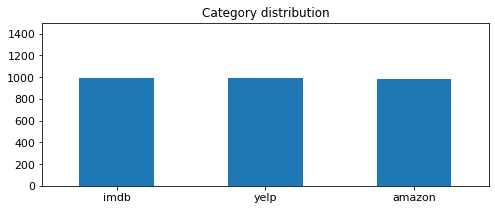

In [206]:
print(data.category_name.value_counts())

# plot barchart for data
data.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 1500],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

imdb      335
yelp      333
amazon    332
Name: category_name, dtype: int64


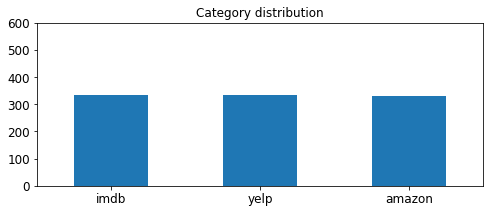

In [207]:
print(data_sample.category_name.value_counts())

# plot barchart for data_sample
data_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 600], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

imdb      335
yelp      333
amazon    332
Name: category_name, dtype: int64


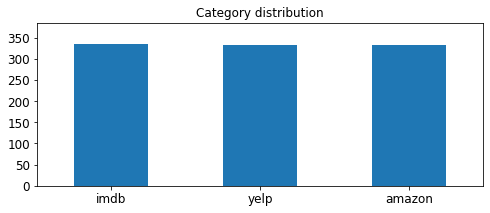

In [210]:
upper_bound = max(data_sample.category_name.value_counts()) + 50

print(data_sample.category_name.value_counts())

data_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

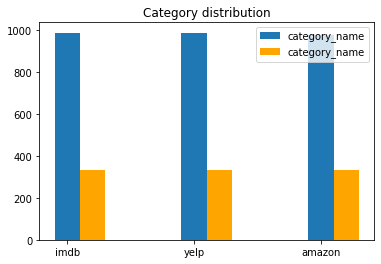

In [214]:
import numpy as np

width = 0.2
plt.bar(np.arange(len(data.category_name.value_counts())), data.category_name.value_counts(), width = width)
plt.bar(np.arange(len(data_sample.category_name.value_counts())) + width, data_sample.category_name.value_counts(), width = width, color = 'orange')
plt.title('Category distribution')
plt.xticks(np.arange(3), ('imdb', 'yelp', 'amazon'))
plt.legend(('category_name', 'category_name'))

In [215]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chuck\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [216]:
# takes a like a minute or two to process
data['unigrams'] = data['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [217]:
data[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [218]:
data[0:4]

,sentence,score,category,category_name,unigrams
0,So there is no way for me to plug it in here i...,0.0,0,amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1.0,0,amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1.0,0,amazon,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0.0,0,amazon,"[Tied, to, charger, for, conversations, lastin..."


In [219]:
list(data[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

In [224]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.sentence)

In [225]:
analyze(" ".join(list(data[:1].sentence))) #more clean

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [226]:
data_counts.shape

(2957, 5148)

In [227]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [228]:
data[0:5]

,sentence,score,category,category_name,unigrams
0,So there is no way for me to plug it in here i...,0.0,0,amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1.0,0,amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1.0,0,amazon,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0.0,0,amazon,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1.0,0,amazon,"[The, mic, is, great, .]"


In [229]:
# we convert from sparse array to normal array
data_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [230]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [231]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [234]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [235]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [237]:
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:20]]

In [238]:
plot_z = data_counts[0:20, 0:20].toarray()

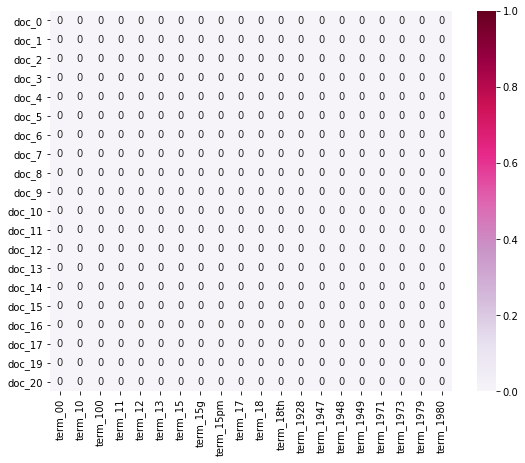

In [239]:
import seaborn as sns
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

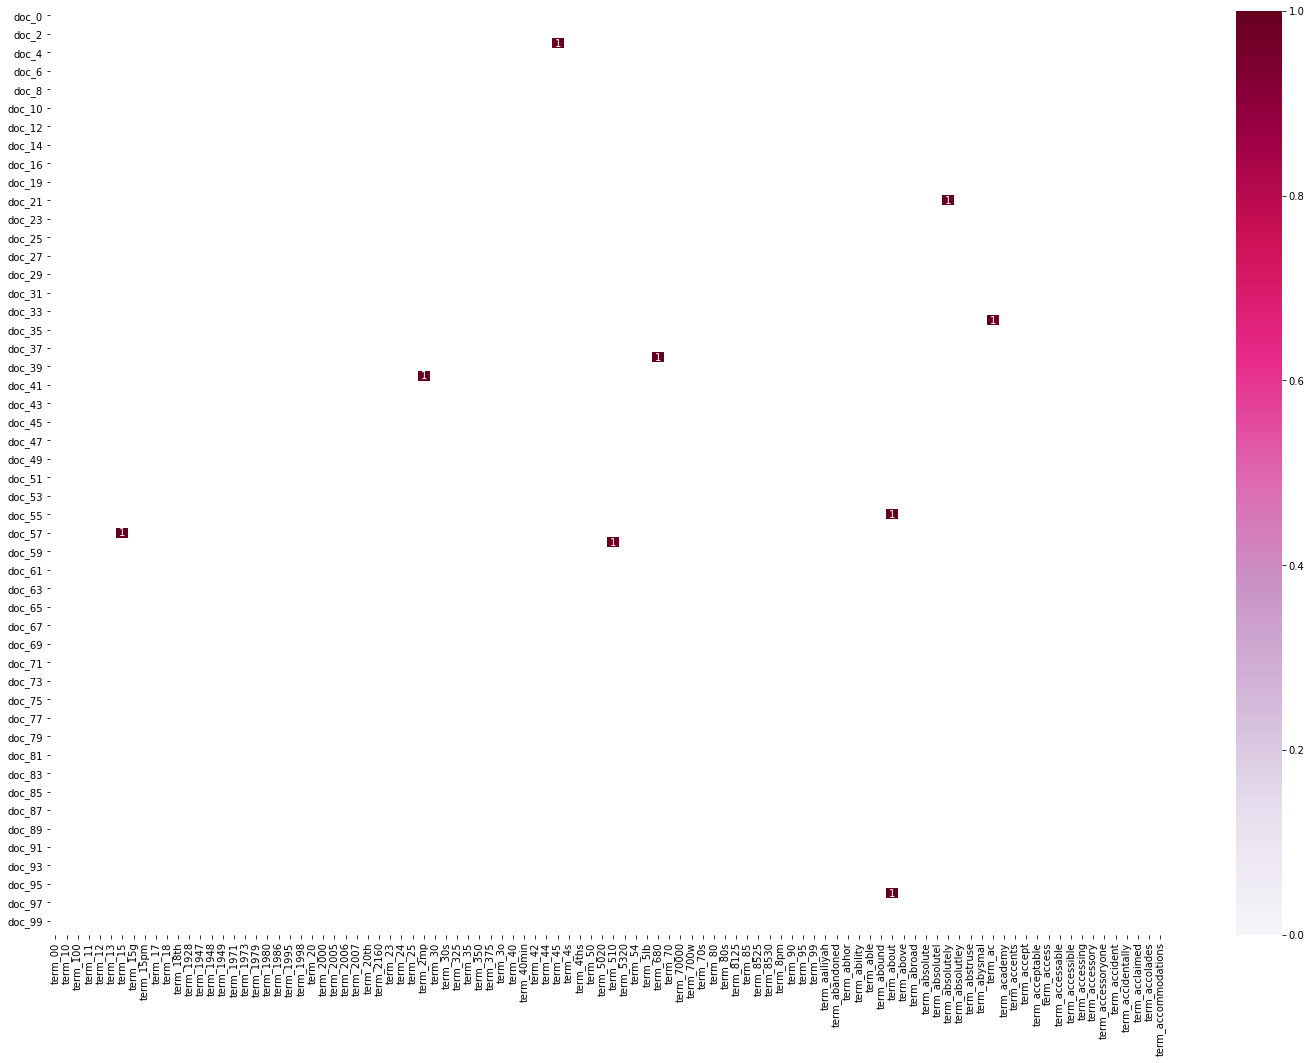

In [242]:
plot_x1 = ["term_"+str(i) for i in count_vect.get_feature_names()[0:100]]
plot_y1 = ["doc_"+ str(i) for i in list(data.index)[0:100]]
plot_z1 = data_counts[0:100, 0:100].toarray()

df_todraw = pd.DataFrame(plot_z1, columns = plot_x1, index = plot_y1)
plt.subplots(figsize=(25, 17))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True, mask=df_todraw<1)

In [243]:
from sklearn.decomposition import PCA

In [244]:
data_reduced = PCA(n_components = 2).fit_transform(data_counts.toarray())

In [246]:
data_reduced.shape

(2957, 2)

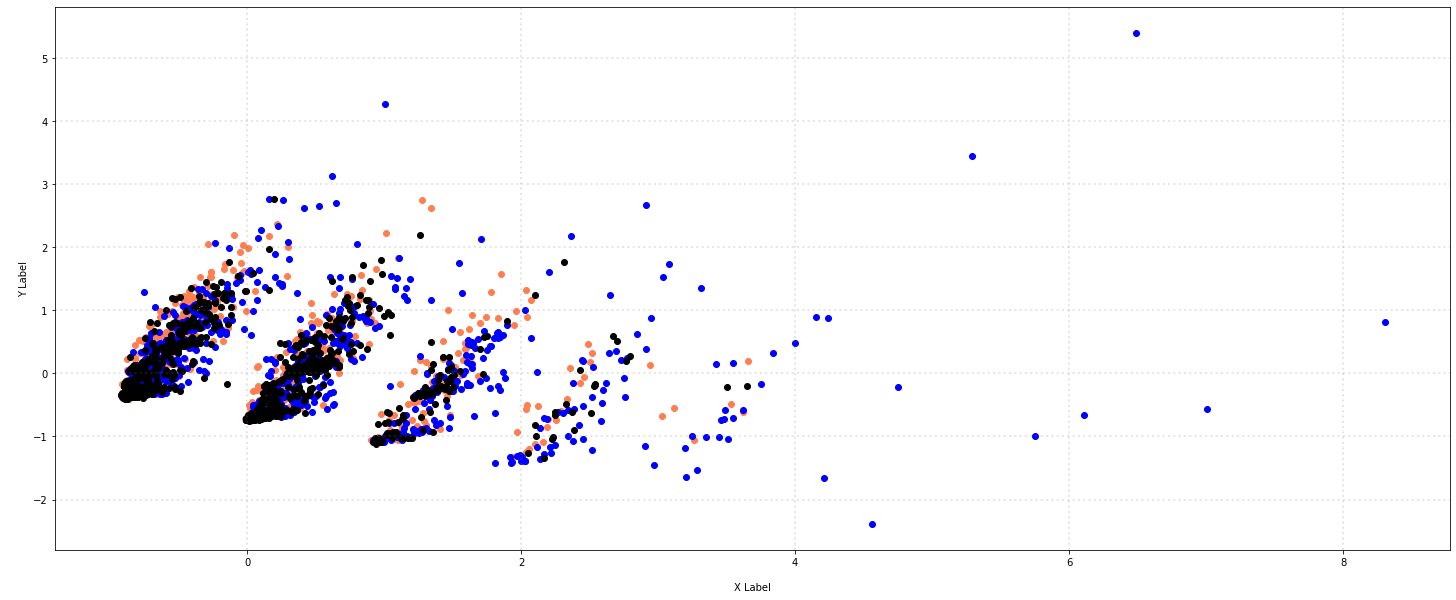

In [332]:
col = ['coral', 'blue', 'black']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = data_reduced[data['category_name'] == category].T[0]
    ys = data_reduced[data['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [248]:
term_frequencies = []
for j in range(0,data_counts.shape[1]):
    term_frequencies.append(sum(data_counts[:,j].toarray()))

In [249]:
term_frequencies = np.asarray(data_counts.sum(axis=0))[0]

In [250]:
term_frequencies[0]

1

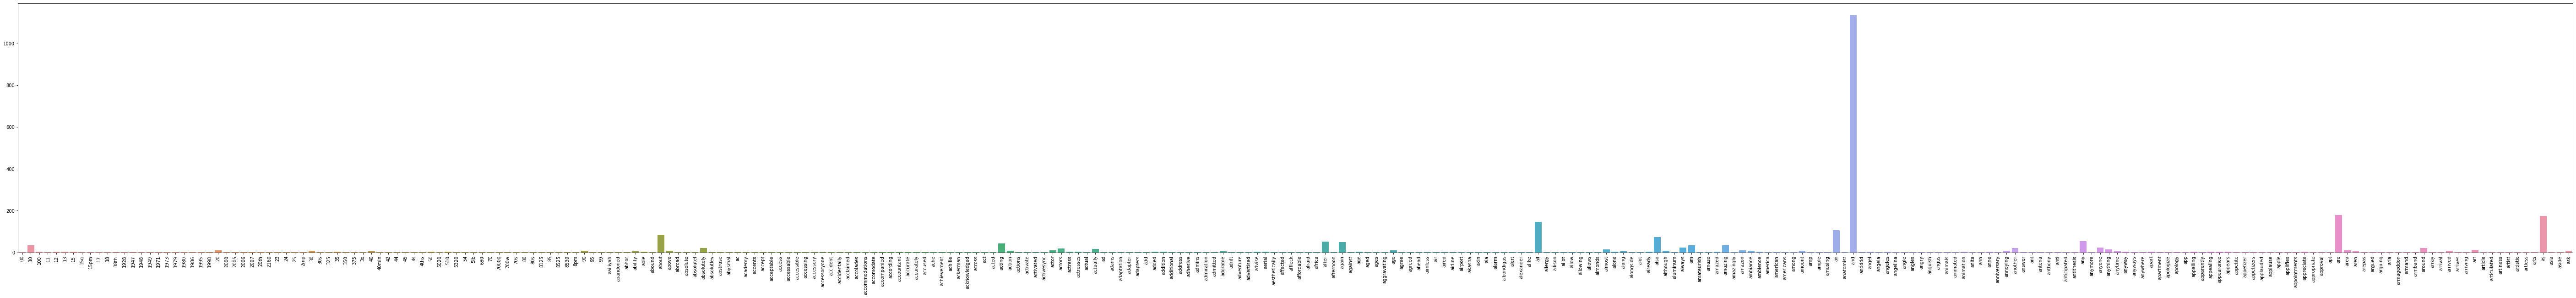

In [251]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

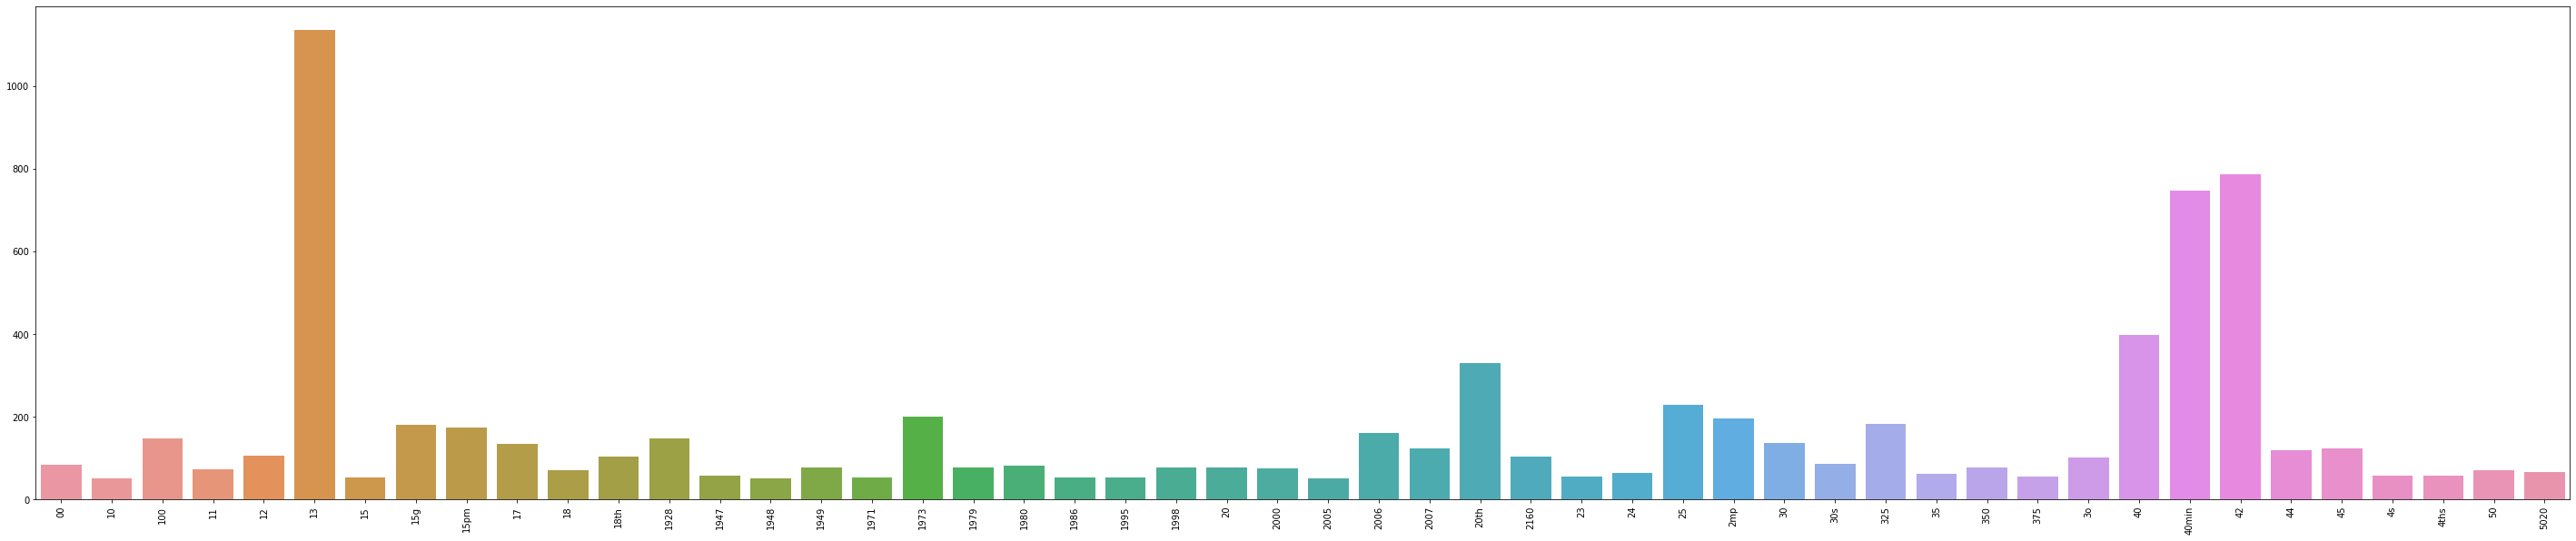

In [256]:
new_term_frequencies = term_frequencies[term_frequencies > 50]
plt.subplots(figsize=(50, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:50], 
            y=new_term_frequencies[:50])
g.set_xticklabels(count_vect.get_feature_names()[:50], rotation = 90);

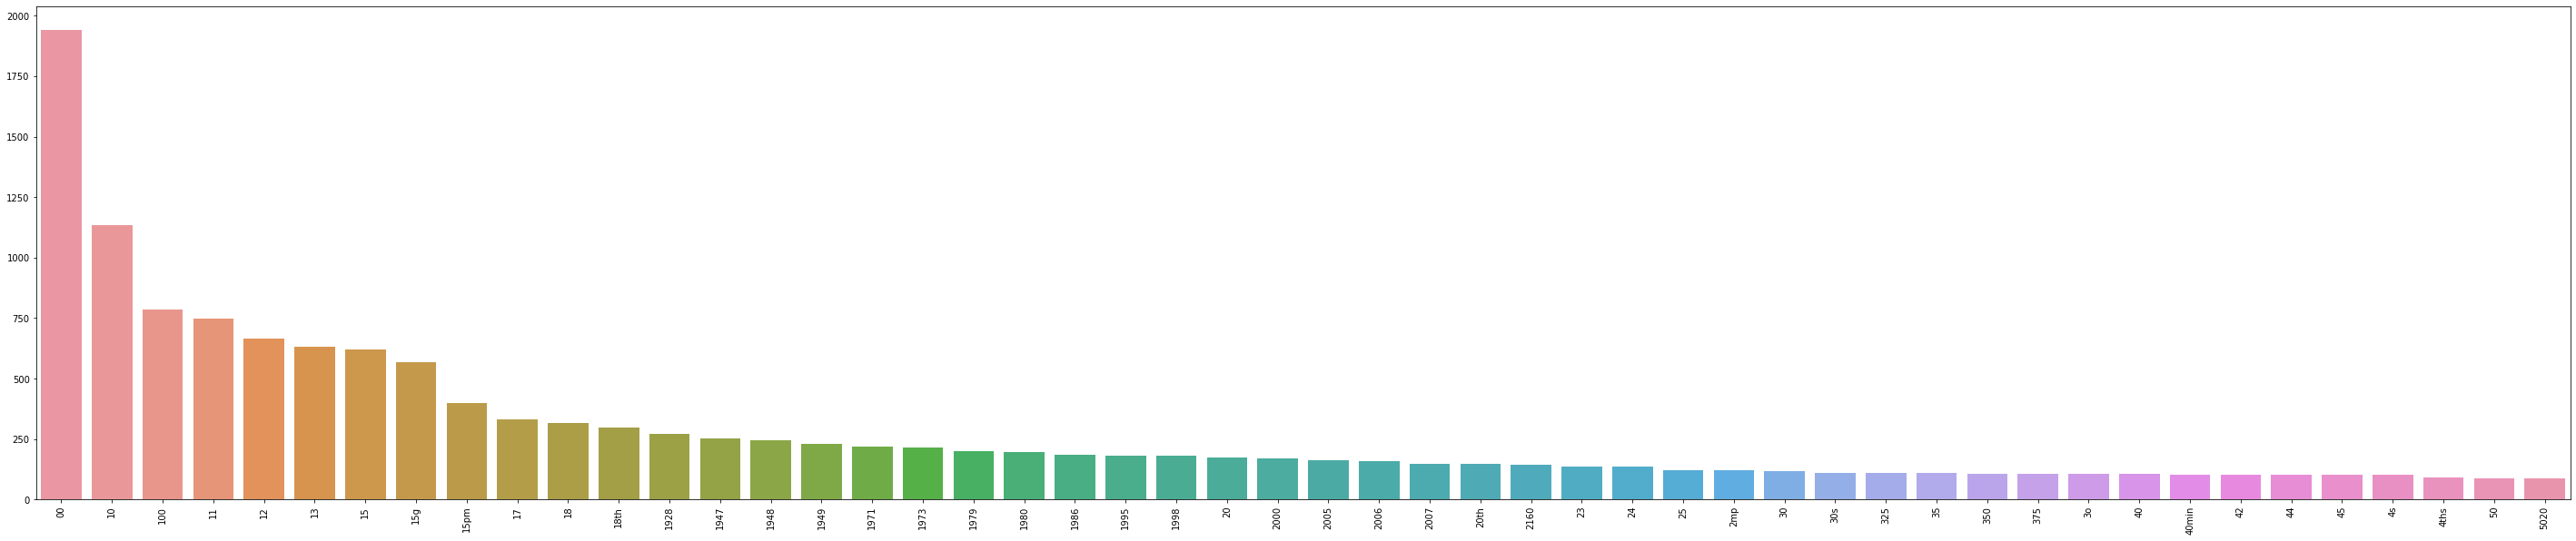

In [258]:
new_term_frequencies = term_frequencies[term_frequencies > 50]
sort = np.argsort(-new_term_frequencies)
plt.subplots(figsize=(50, 10))
g = sns.barplot(x=np.asarray(count_vect.get_feature_names())[sort[:50]], 
            y=new_term_frequencies[sort[:50]])
g.set_xticklabels(count_vect.get_feature_names()[:50], rotation = 90);

In [259]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

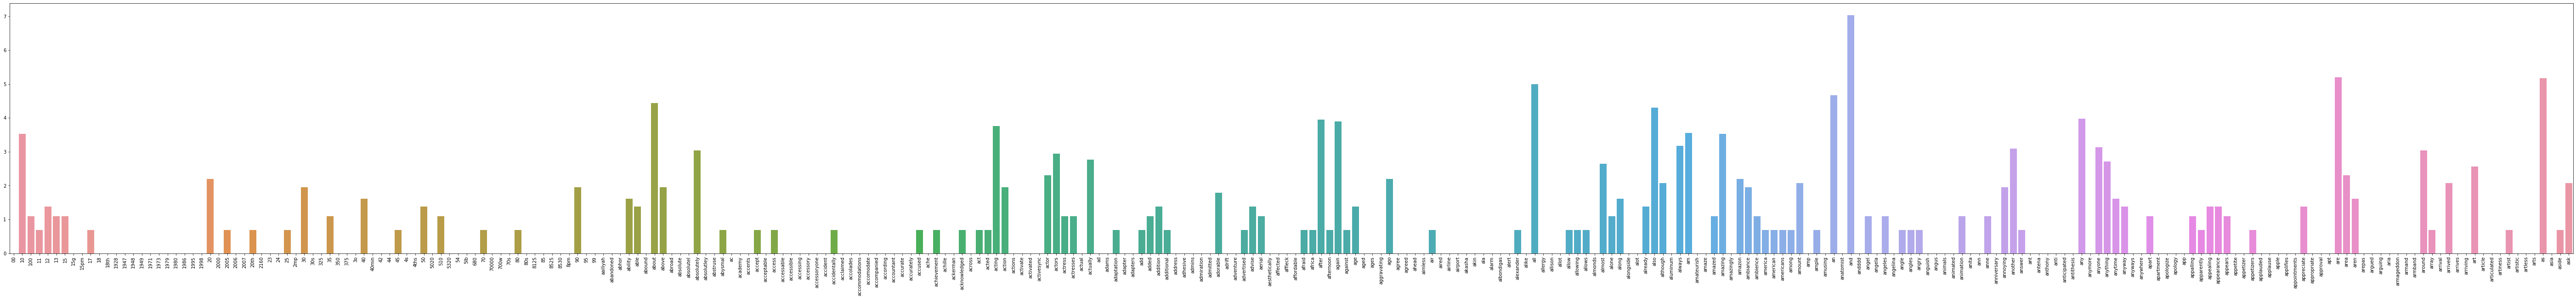

In [260]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [261]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [262]:
mlb = preprocessing.LabelBinarizer()

In [263]:
mlb.fit(data.category)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [264]:
mlb.classes_

array([0, 1, 2], dtype=int64)

In [265]:
data['bin_category'] = mlb.transform(data['category']).tolist()

In [267]:
data[0:9]

,sentence,score,category,category_name,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0.0,0,amazon,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"
1,"Good case, Excellent value.",1.0,0,amazon,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,Great for the jawbone.,1.0,0,amazon,"[Great, for, the, jawbone, .]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0.0,0,amazon,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
4,The mic is great.,1.0,0,amazon,"[The, mic, is, great, .]","[1, 0, 0]"
5,I have to jiggle the plug to get it to line up...,0.0,0,amazon,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0, 0]"
6,If you have several dozen or several hundred c...,0.0,0,amazon,"[If, you, have, several, dozen, or, several, h...","[1, 0, 0]"
7,If you are Razr owner...you must have this!,1.0,0,amazon,"[If, you, are, Razr, owner, ..., you, must, ha...","[1, 0, 0]"
8,"Needless to say, I wasted my money.",0.0,0,amazon,"[Needless, to, say, ,, I, wasted, my, money, .]","[1, 0, 0]"


In [268]:
mlb.fit(data.category_name)
mlb.classes_
data['bin_category'] = mlb.transform(data['category_name']).tolist()
data[0:9]

,sentence,score,category,category_name,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0.0,0,amazon,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"
1,"Good case, Excellent value.",1.0,0,amazon,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,Great for the jawbone.,1.0,0,amazon,"[Great, for, the, jawbone, .]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0.0,0,amazon,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
4,The mic is great.,1.0,0,amazon,"[The, mic, is, great, .]","[1, 0, 0]"
5,I have to jiggle the plug to get it to line up...,0.0,0,amazon,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0, 0]"
6,If you have several dozen or several hundred c...,0.0,0,amazon,"[If, you, have, several, dozen, or, several, h...","[1, 0, 0]"
7,If you are Razr owner...you must have this!,1.0,0,amazon,"[If, you, are, Razr, owner, ..., you, must, ha...","[1, 0, 0]"
8,"Needless to say, I wasted my money.",0.0,0,amazon,"[Needless, to, say, ,, I, wasted, my, money, .]","[1, 0, 0]"


In [270]:
document_to_transform_1 = []
random_record_1 = data.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = data.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = data.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [271]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [272]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [273]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


# Part 3

In [339]:
t1 = pd.crosstab(index = data['category_name'], columns = 'r_count')

In [340]:
print(t1)

col_0          r_count
category_name         
amazon             980
imdb               989
yelp               988


<BarContainer object of 3 artists>

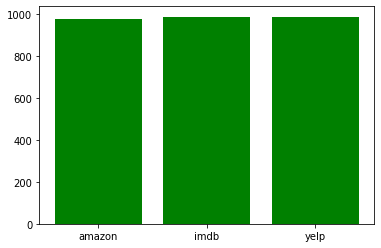

In [341]:
plt.bar(t1.index, t1['r_count'], color='g') #plt.bar

Text(0, 0.5, 'numbers')

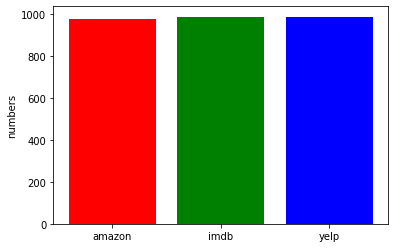

In [344]:
plt.bar(t1.index, t1['r_count'], color=['r','g','b'])
plt.ylabel('numbers')

Text(0.5, 1.0, 'PieChart')

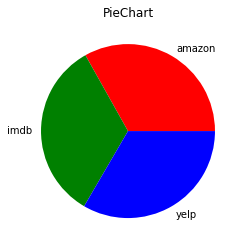

In [346]:
# easy to see the percentage of each category
plt.pie(t1['r_count'], labels=t1.index, colors=['r','g','b'])
plt.title('PieChart')

In [326]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = data["sentence"]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.shape)

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17', '18', '18th', '1928', '1947', '1948', '1949', '1971', '1973', '1979', '1980', '1986', '1995', '1998', '20', '2000', '2005', '2006', '2007', '20th', '2160', '23', '24', '25', '2mp', '30', '30s', '325', '35', '350', '375', '3o', '40', '40min', '42', '44', '45', '4s', '4ths', '50', '5020', '510', '5320', '54', '5lb', '680', '70', '70000', '700w', '70s', '80', '80s', '8125', '85', '8525', '8530', '8pm', '90', '95', '99', 'aailiyah', 'abandoned', 'abhor', 'ability', 'able', 'abound', 'about', 'above', 'abroad', 'absolute', 'absolutel', 'absolutely', 'absolutley', 'abstruse', 'abysmal', 'ac', 'academy', 'accents', 'accept', 'acceptable', 'access', 'accessable', 'accessible', 'accessing', 'accessory', 'accessoryone', 'accident', 'accidentally', 'acclaimed', 'accolades', 'accommodations', 'accomodate', 'accompanied', 'according', 'accountant', 'accurate', 'accurately', 'accused', 'ache', 'achievement', 'achille', 'ackerman', 'ack

In [327]:
from sklearn.datasets import make_classification
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

nb_samples = 300
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0)

In [328]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.96

In [329]:
data1 = np.array(data["category"])

In [330]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_gnb_score = gnb.predict_proba(X_test)
lr = LogisticRegression() 
lr.fit(X_train, Y_train)
Y_lr_score = lr.decision_function(X_test)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(Y_test, Y_gnb_score[:, 1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(Y_test, Y_lr_score)

In [331]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score

digits = load_digits()

gnb = GaussianNB()
mnb = MultinomialNB()

print(cross_val_score(gnb, digits.data, digits.target, scoring='accuracy', cv=10).mean())

print(cross_val_score(mnb, digits.data, digits.target, scoring='accuracy', cv=10).mean())

0.8113904407200497
0.8797858472998138


# Part 4

The course go through very quickly. So I think at the very beginning, we did not talk about why we choose those 4 categories. And I think if we have time for next course, we can try to use more different tools to do the same thing, like use different tools to make same plot.